In [1]:
import lane_detection
import lane_following
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[1.9606741573033708, 410.69914040114617, 782, 728, 960, 1077], [4.3561643835616435, 549.3050314465409, 724, 761, 797, 1079]]
[0, 0, 480.00208592384354, 0, 821.9452883702074, 1079.9999999999998]


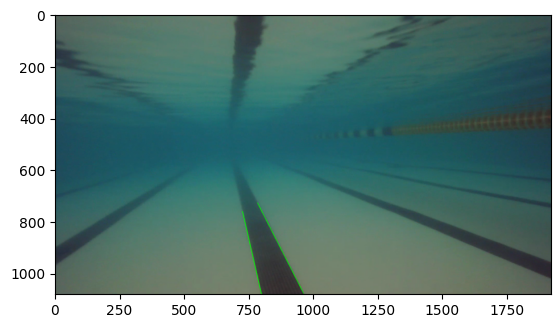

[[6.349206349206349, 780.5949999999999, 871, 574, 934, 974], [-2.0463917525773194, 1095.3375314861462, 571, 1073, 765, 676]]
[0, 0, 937.9662657430731, 0, 1439.9632613124888, 1080.0]


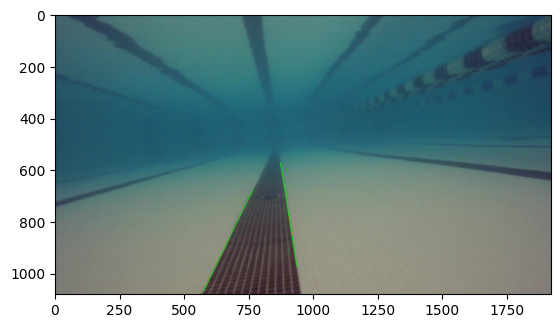

KeyboardInterrupt: 

In [6]:
vcap = cv2.VideoCapture("AUV_Vid.mkv")

frequency = 300
count = 0

while True:
    ret, img = vcap.read()

    if not ret:
        break


    if count % frequency == 0:
        c = img.shape[0]/2
        lines = lane_detection.detect_lines(img, threshold1=30,threshold2=40, apertureSize=3,maxLineGap = 200, minLineLength=300)
        lanes = lane_detection.detect_lanes(lines)
        drawing = lane_detection.draw_lanes(img, lanes)
        #newimg = lane_detection.draw_lines(img, lines)


        print(lanes)
        center = lane_following.get_lane_center(lanes)
        cen = lane_following.get_center_line(center[0], center[1],img.shape[0])
        print(cen)
        plt.imshow(cv2.cvtColor(lane_following.draw_center(img, cen), cv2.COLOR_BGR2RGB))
        plt.show()
        #print(lane_following.recommend_direction(center[0], center[1], c))

    count += 1